In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting and visualization of data
import seaborn as sns # advanced data visualization based on matplotlib
import scipy.stats as stats # scientific computing and technical computing
import sklearn # machine learning and predictive data analysis

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imfs-gdp-data-1980-2028-global-trends/gdp.csv


# Importing Dataset

In [37]:
df = pd.read_csv("/kaggle/input/imfs-gdp-data-1980-2028-global-trends/gdp.csv")

In [38]:
# Statistical summary
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,3007.557961,2985.078478,2845.693246,2751.168276,2731.342140,2828.163404,3166.998965,3649.521351,4002.694013,4068.991202,...,15249.341452,14190.009197,16244.182768,16825.188969,17772.092285,18678.934614,19537.704833,20364.598039,21136.849899,21931.253307
std,5165.616558,5102.793252,4680.207607,4407.876056,4348.569898,4511.630577,5011.311206,5943.895781,6520.006879,6682.817670,...,19585.341197,18684.064272,21664.193281,22032.679903,23110.907576,24210.550616,25281.936735,26251.894367,27151.945329,28077.506579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2382.925750,2261.865250,2432.359250,2407.781750,2539.789750,2646.656000,2805.613750,2833.000250,2704.142250,2768.451750
50%,894.572500,962.783500,895.076500,843.802000,878.059000,849.600000,954.215000,1010.010000,1119.853000,989.554500,...,6180.292000,5604.953500,6249.515500,6677.603000,7387.639000,7530.690000,7825.917500,8194.115500,8615.552000,9233.257000
75%,2763.777250,2916.105250,2783.255250,2764.846000,2623.163500,2796.377000,3219.743000,3575.712000,3977.245750,3504.064750,...,19370.403250,17735.547750,20355.203750,21434.165750,23497.564750,25813.178250,28485.728000,29801.730500,30671.373250,31428.879000
max,41311.881000,42237.276000,36927.264000,32717.479000,29957.847000,27912.523000,24529.567000,30520.621000,32794.286000,31440.365000,...,113860.533000,117616.151000,134925.164000,126598.103000,135605.438000,140307.606000,144960.312000,148829.206000,151657.777000,154419.811000


The statistical summary provides insights into the GDP data across various years for different countries. It shows the count, mean, and other statistical measures for each year from 1980 to 2028. This summary is crucial for understanding the overall distribution and central tendencies of the GDP values over time.

In [39]:
# Number of missing values per column
df.isnull().sum()

Country    0
1980       1
1981       1
1982       1
1983       1
1984       1
1985       1
1986       1
1987       1
1988       1
1989       1
1990       1
1991       1
1992       1
1993       1
1994       1
1995       1
1996       1
1997       1
1998       1
1999       1
2000       1
2001       1
2002       1
2003       1
2004       1
2005       1
2006       1
2007       1
2008       1
2009       1
2010       1
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
2018       1
2019       1
2020       1
2021       1
2022       1
2023       1
2024       1
2025       1
2026       1
2027       1
2028       1
dtype: int64

The missing values count indicates that there is exactly 1 missing value for each year from 1980 to 2028. There are no missing values in the "Country" column, ensuring that each entry is associated with a specific country.

# Cleaning the Dataset

**1. Filling Missing Values:** Given the nature of the data, missing values could be filled using various methods such as forward fill, backward fill, or interpolation. The choice of method may depend on the pattern of GDP growth for the respective country, considering economic trends.

**2. Country Counts:** To ensure there are no duplicate entries for countries, we will check the uniqueness of the "Country" column.

**3. Data Cleaning:** The necessary data cleaning steps will include handling missing values and verifying the uniqueness of country entries. This will prepare the data for further analysis.

Let's proceed with checking for duplicate country entries and decide on the method for filling missing values based on the pattern of the data.

In [40]:
# check for duplicate country entries
df['Country'].value_counts()

Country
Afghanistan                         1
Rwanda                              1
Saint Lucia                         1
Saint Vincent and the Grenadines    1
Samoa                               1
                                   ..
Iraq                                1
Ireland                             1
Israel                              1
Italy                               1
©IMF, 2023                          1
Name: count, Length: 229, dtype: int64

The check for duplicate country entries confirms that each country is listed exactly once in the dataset. This includes individual countries as well as some regional and economic groupings such as "Euro area", "European Union", and "World". This indicates there are no duplicate entries for individual countries, but it's important to note the presence of broader economic regions and groupings.

In [41]:
# Unique Coutries
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 

In [42]:
df['Country'] = df['Country'].replace("China, People's Republic of", "China")

df['Country'] = df['Country'].replace("Russian Federation", "Rassia")

In [43]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep. of the', 'Congo, Republic of ',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala'

**1. Filling Missing Values:** Given there's only 1 missing value per year, we can consider filling these missing values with a method that best suits the temporal nature of the data, such as forward fill or interpolation. This approach assumes that GDP values from one year to the next do not change drastically, making it a reasonable method for filling in the gaps.

**2. Data Cleaning:** With the confirmation that there are no duplicate country entries, the next step in data cleaning involves addressing the missing values. Once the missing values are handled, the dataset will be ready for analysis.

Let's proceed with filling the missing values using forward fill method, which carries the last known value forward. This method is chosen because it's a common practice for time series data where the next valid observation is assumed to be similar to the last available data.

In [44]:
# fill missing values using forward fill method
df_filled = df.fillna(method='ffill', axis=1)

# check if there are any missing values left
df_filled_missing_values = df_filled.isnull().sum()

df_filled_missing_values

/tmp/ipykernel_33/3027685276.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill', axis=1)


Country    0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
2026       0
2027       0
2028       0
dtype: int64

After filling the missing values using the forward fill method, there are no missing values left in the dataset. This means each year from 1980 to 2028 now has complete data for all countries listed.

### Summary of Data Cleaning Process:

* Statistical Summary: We began by examining the statistical summary of the dataset to understand the distribution of GDP values across different years.
* Missing Values: We identified that there was exactly 1 missing value for each year, with no missing values in the "Country" column.
* Filling Missing Values: The missing values were filled using the forward fill method, which is suitable for time series data, ensuring continuity in the GDP values from one year to the next.
* Country Counts: We verified that each country is listed exactly once, including checks for broader economic regions and groupings.
* Data Cleaning Completed: With the missing values addressed and no duplicate country entries, the dataset is now clean and ready for analysis.
The dataset is now prepared for further analysis, with complete data for each year and country.

# Exploratory Data Analysis

### Trend Analysis:

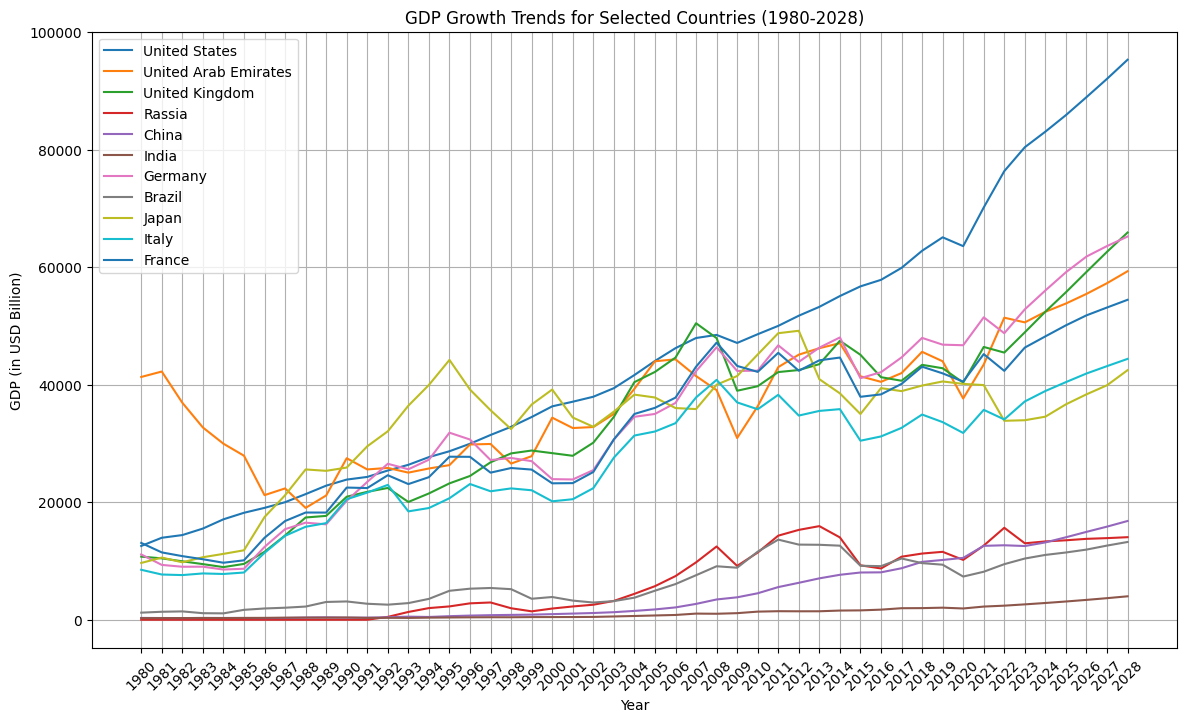

In [45]:
# few countries for trend analysis
# we can see trends for every country in the dataset but the plot will be
# quite clustered and non redable
selected_countries = ['United States', 'United Arab Emirates',
                      'United Kingdom', 'Rassia', 'China', 'India',
                      'Germany', 'Brazil', 'Japan', 'Italy', 'France']

filtered_df = df[df['Country'].isin(selected_countries)]

# plotting GDP trends
plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_data = filtered_df[filtered_df['Country'] == country]
    plt.plot(country_data.columns[1:], country_data.iloc[0, 1:], label=country)

plt.title('GDP Growth Trends for Selected Countries (1980-2028)')
plt.xlabel('Year')
plt.ylabel('GDP (in USD Billion)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The GDP growth trends for selected countries *(United States, United Arab Emirates, United Kingdom, Rassia, China, India, Germany, Brazil, Japan, Italy, France)* from 1980 to 2028 have been plotted. The graph illustrates the economic growth patterns of these countries, showcasing their GDP changes over the years. This visualization helps in identifying patterns such as consistent growth, decline, or volatility in the economy of these nations.

### Contribution of India in the growth of per capita GDP of Emerging and Developing Asia

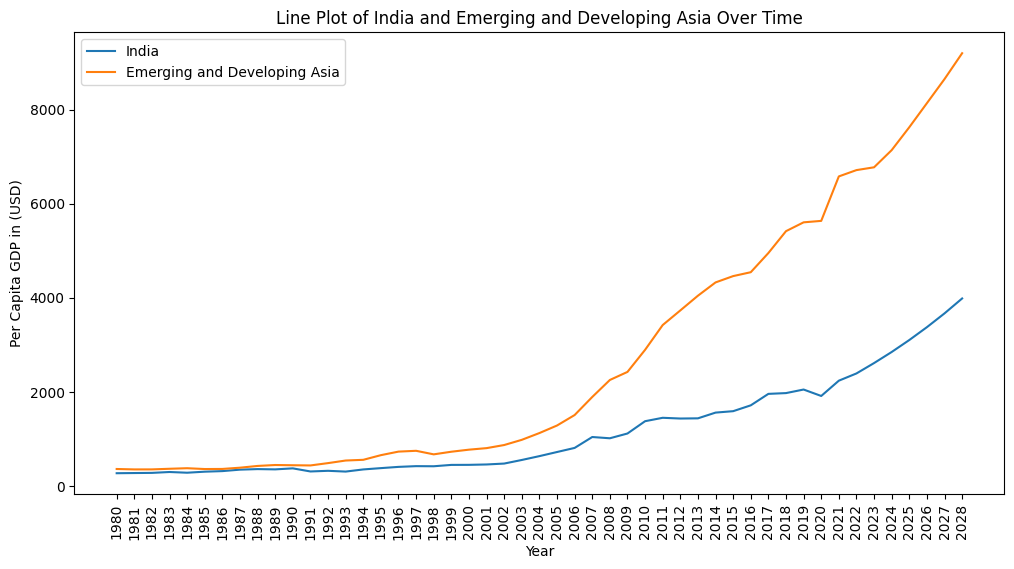

In [46]:
year = df.columns[1:]
val1 = df.query('Country == "India"').iloc[:, 1:].values.flatten()
val2 = df.query('Country == "Emerging and Developing Asia"').iloc[:,1:].values.flatten()
plt.figure(figsize=(12, 6))
plt.plot(year,val1, label='India')
plt.plot(year,val2, label='Emerging and Developing Asia')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Per Capita GDP in (USD)')
plt.title('Line Plot of India and Emerging and Developing Asia Over Time')
plt.legend()
plt.show()

In [47]:
correlation_matrix = np.corrcoef(val1,val2 )
correlation_matrix[1,0]

0.9903860244728218

The above graph as well as the correlation coefficient clearly indicates that the growth of India has positively contributed to the growth of the region.

### Top and Bottom Economies in 2023:

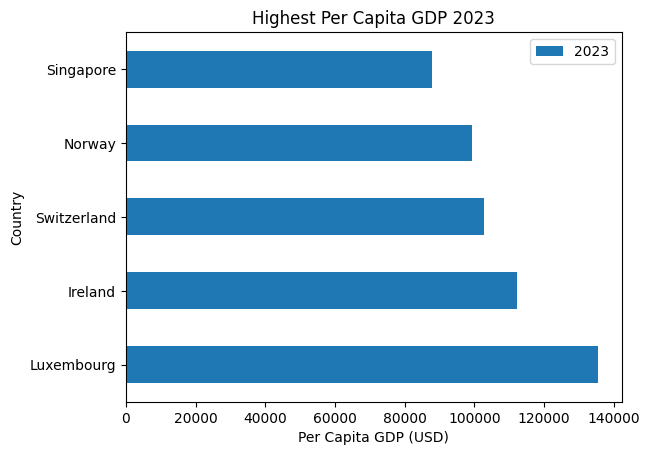

In [48]:
to_exclude = ['Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia and the Caucasus', 'East Asia', 'Eastern Europe ', 'Europe', 'Middle East (Region)', 'North Africa', 'North America', 'Pacific Islands ', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa (Region) ', 'Western Europe', 'Western Hemisphere (Region)', 'ASEAN-5', 'Advanced economies', 'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies', 'Euro area', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)', 'Middle East and Central Asia', 'Other advanced economies', 'Sub-Saharan Africa', 'World']

# Exclude the regions from the dataframe
df_filtered = df[~df['Country'].isin(to_exclude)]

df_filtered[['Country','2023']].sort_values(by='2023', ascending=False)\
  .set_index('Country')\
  .head(5)\
  .plot(kind='barh',title='Highest Per Capita GDP 2023')
plt.xlabel('Per Capita GDP (USD)')
plt.show()

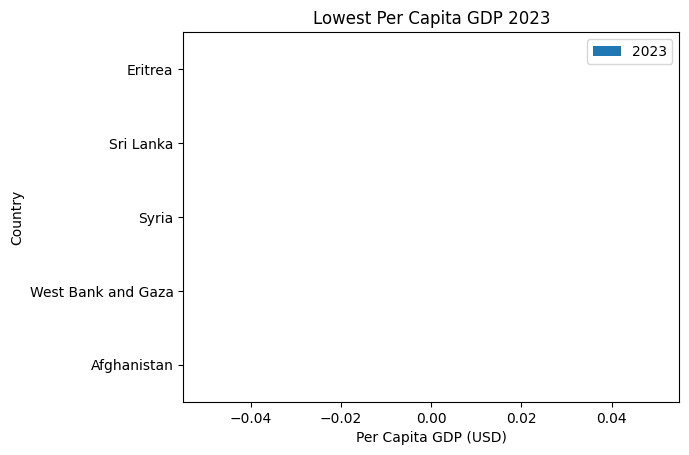

In [49]:
df_filtered[['Country','2023']].sort_values(by='2023', ascending=True)\
  .set_index('Country')\
  .head(5)\
  .plot(kind='barh',title='Lowest Per Capita GDP 2023')
plt.xlabel('Per Capita GDP (USD)')
plt.show()

### 5 Economies with the lowest per capita GDP in 2023 and their past 2 year per capita GDP

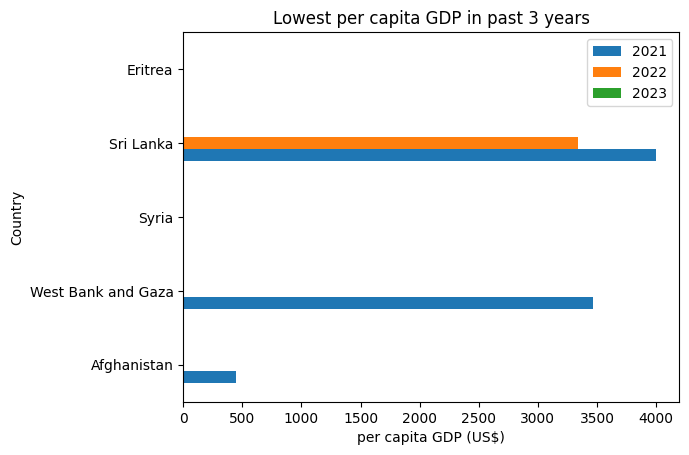

In [50]:
df_filtered[['Country','2021','2022','2023']].sort_values(by='2023', ascending=True)\
  .set_index('Country')\
  .head(5)\
  .plot(kind='barh',title='Lowest per capita GDP in past 3 years')
plt.xlabel('per capita GDP (US$)')
plt.show()

### Top and Bottom Economies in 2028:

In [51]:
# Identifying top and bottom economies based on the latest GDP values
latest_year = '2028'
top_economies = df.nlargest(5, latest_year)[['Country', latest_year]]
bottom_economies = df.nsmallest(5, latest_year)[['Country', latest_year]]

print('Top 5 Economies in 2028:\
', top_economies)
print('\
Bottom 5 Economies in 2028:\
', bottom_economies)

Top 5 Economies in 2028:          Country        2028
101   Luxembourg  154419.811
81       Ireland  136521.267
167  Switzerland  130316.085
76       Iceland  115324.590
155    Singapore  108204.034
Bottom 5 Economies in 2028:          Country  2028
0    Afghanistan   0.0
54       Eritrea   0.0
96       Lebanon   0.0
131     Pakistan   0.0
163    Sri Lanka   0.0


**Top 5 Economies** based on their GDP values in 2028 are Luxembourg, Ireland, Switzerland, Iceland, and Singapore. These countries are projected to have the highest GDP values, indicating strong economic performance.

**Bottom 5 Economies** with the lowest GDP values in 2028 are Afghanistan, Eritrea, Lebanon, Pakistan, and Sri Lanka. These countries are shown to have a GDP value of 0.0, which may indicate missing or unprojected data rather than an actual GDP of zero.

The analysis highlights significant disparities in economic performance across countries, with the top economies showcasing robust growth while the bottom economies indicate areas with potential data gaps or economic challenges.

### Global trend of the per capita GDP

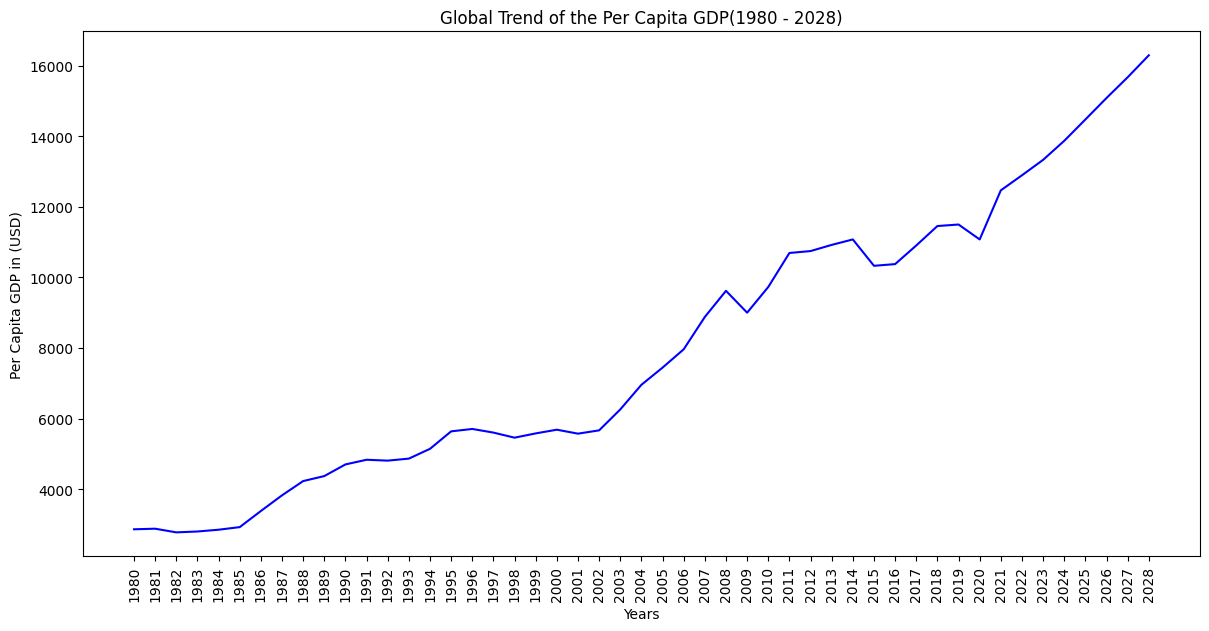

In [52]:
years = df.columns[1:]
world = df.query('Country == "World"').iloc[:,1:].values.flatten()
plt.figure(figsize=(12, 6))
plt.plot(years,world,color='blue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Per Capita GDP in (USD)')
plt.title('Global Trend of the Per Capita GDP(1980 - 2028)')
plt.show()

The plot provides a visual representation of how global economic prosperity, as measured by Per Capita GDP, has evolved and is projected to evolve, highlighting periods of growth and offering insights into the overall economic health of the world.